In [3]:
### 라이브러리 임포트 ###

from utils import l2_and_gradient_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow import keras

ModuleNotFoundError: No module named 'utils'

In [4]:
### 데이터셋 임포트 ###

x_train = np.load('/home/YIm/다운로드/X_train.npy')
y_train = np.load('/home/YIm/다운로드/y_train.npy')
x_test = np.load('/home/YIm/다운로드/X_test.npy')
y_test = np.load('/home/YIm/다운로드/y_test.npy')

NameError: name 'np' is not defined

In [1]:
x_train.shape

NameError: name 'x_train' is not defined

In [7]:
def get_session():

    gpu_fraction = 0.9
    visible_device_list = 0,1
    
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction,visible_device_list=visible_device_list)


    return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [8]:
### 모델 설정 ###

model = Sequential()

model.add(Dense(64*64,input_shape=(2*95*90,),activation='tanh'))
model.add(Dense(64*64,activation='tanh'))
model.add(Reshape((64,64,1),input_shape=(64*64,)))
model.add(Conv2D(64,[5,5],padding='same',activation='relu'))
model.add(Conv2D(64,[5,5],padding='same',activation='relu'))
model.add(Conv2DTranspose(1,[7,7],padding='same'))

In [9]:
### 모델 시각화 ###
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              70045696  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
reshape (Reshape)            (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 64, 64, 1)         3137      
Total params: 86,934,273
Trainable params: 86,934,273
Non-trainable params: 0
____________________________________________

In [10]:
model.compile(loss=l2_and_gradient_loss, optimizer=Adam(lr=0.0001))

In [11]:
model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Train on 32512 samples, validate on 3584 samples
Epoch 1/300
32512/32512 [==============================] - 25s 775us/sample - loss: 3517.6062 - val_loss: 2772.6712
Epoch 2/300
32512/32512 [==============================] - 22s 665us/sample - loss: 2530.4872 - val_loss: 2369.7214
Epoch 3/300
32512/32512 [==============================] - 22s 673us/sample - loss: 2225.3642 - val_loss: 2152.5764
Epoch 4/300
32512/32512 [==============================] - 22s 674us/sample - loss: 2031.1526 - val_loss: 1999.1191
Epoch 5/300
32512/32512 [==============================] - 22s 676us/sample - loss: 1891.9848 - val_loss: 1884.5654
Epoch 6/300
32512/32512 [==============================] - 22s 680us/sample - loss: 1783.6991 - val_loss: 1787.2494
Epoch 7/300
32512/32512 [==============================] - 22s 676us/sample - loss: 1698.9937 - val_loss: 1719.9631
Epoch 8/300
32512/32512 [==============================] - 22s 691us/sample - loss: 1628.1202 - val_loss: 1656.0314
Epoch 9/300
32512/32512

Epoch 142/300
32512/32512 [==============================] - 23s 693us/sample - loss: 602.0391 - val_loss: 759.0226
Epoch 143/300
32512/32512 [==============================] - 23s 693us/sample - loss: 600.7964 - val_loss: 758.2808
Epoch 144/300
32512/32512 [==============================] - 23s 693us/sample - loss: 600.0387 - val_loss: 760.5257
Epoch 145/300
32512/32512 [==============================] - 23s 696us/sample - loss: 598.7132 - val_loss: 756.8427
Epoch 146/300
32512/32512 [==============================] - 23s 694us/sample - loss: 597.6902 - val_loss: 754.8621
Epoch 147/300
32512/32512 [==============================] - 23s 694us/sample - loss: 596.9061 - val_loss: 753.4306
Epoch 148/300
32512/32512 [==============================] - 23s 696us/sample - loss: 595.8049 - val_loss: 754.6537
Epoch 149/300
32512/32512 [==============================] - 23s 696us/sample - loss: 594.7572 - val_loss: 752.1089
Epoch 150/300
32512/32512 [==============================] - 23s 694us/s

Epoch 283/300
32512/32512 [==============================] - 23s 694us/sample - loss: 521.9919 - val_loss: 683.1791
Epoch 284/300
32512/32512 [==============================] - 23s 694us/sample - loss: 521.6586 - val_loss: 683.0031
Epoch 285/300
32512/32512 [==============================] - 23s 693us/sample - loss: 521.2185 - val_loss: 684.0119
Epoch 286/300
32512/32512 [==============================] - 23s 693us/sample - loss: 520.9710 - val_loss: 682.2806
Epoch 287/300
32512/32512 [==============================] - 23s 693us/sample - loss: 520.6722 - val_loss: 682.0107
Epoch 288/300
32512/32512 [==============================] - 23s 693us/sample - loss: 520.4120 - val_loss: 682.1641
Epoch 289/300
32512/32512 [==============================] - 23s 696us/sample - loss: 520.0988 - val_loss: 682.1962
Epoch 290/300
32512/32512 [==============================] - 23s 698us/sample - loss: 519.8015 - val_loss: 682.7965
Epoch 291/300
32512/32512 [==============================] - 23s 699us/s

In [66]:
# 모델 가중치 저장 #
model.save('/home/YIm/DATA/automap.hdf5')

In [72]:
# 모델 가중치 불러오기 #

from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [69]:
model = load_model('/home/YIm/DATA/automap.hdf5',custom_objects= {'l2_and_gradient_loss': l2_and_gradient_loss})

In [154]:
x_test = np.load('/home/YIm/DATA/X_test.npy')
y_test = np.load('/home/YIm/DATA/y_test.npy')

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


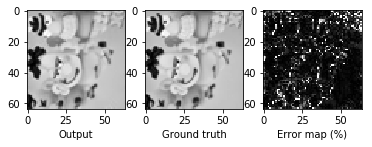

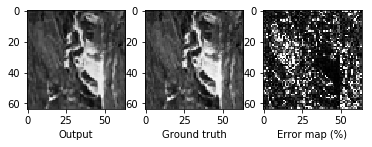

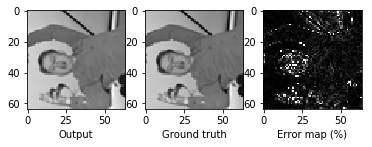

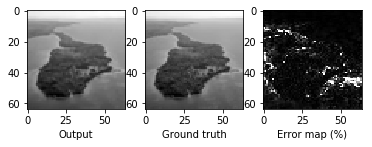

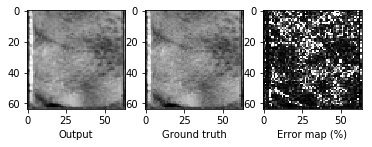

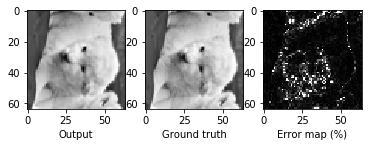

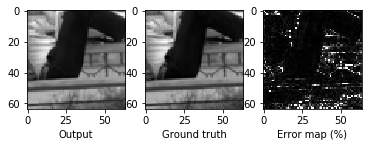

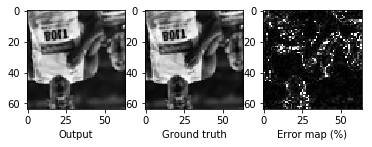

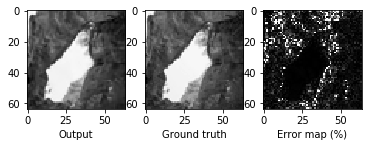

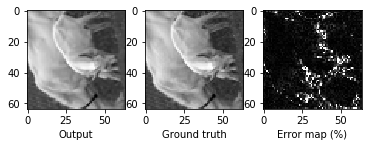

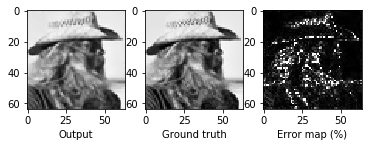

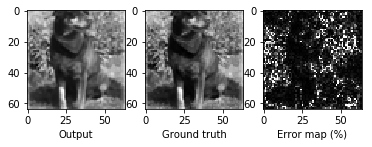

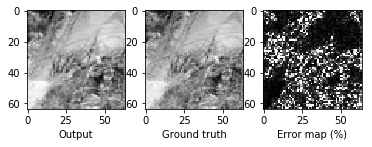

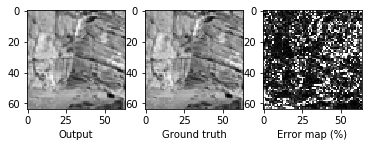

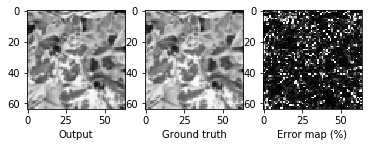

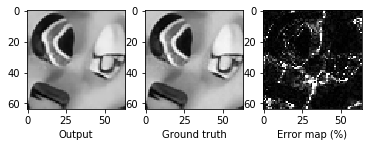

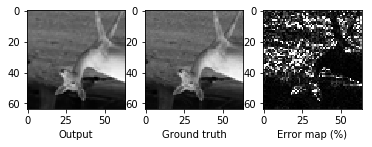

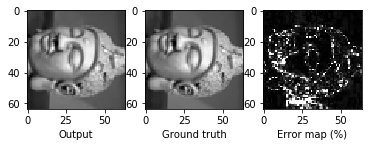

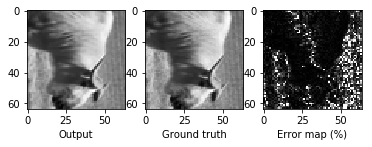

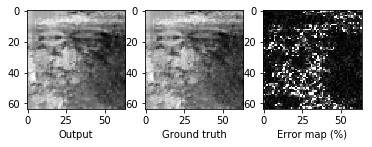

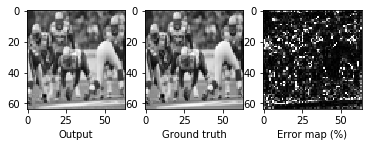

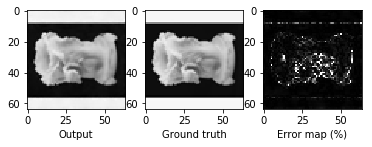

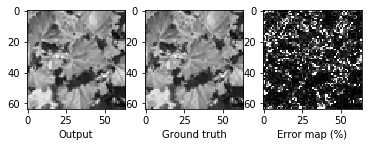

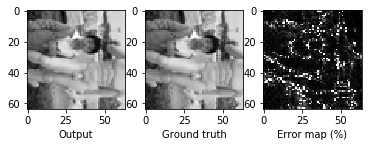

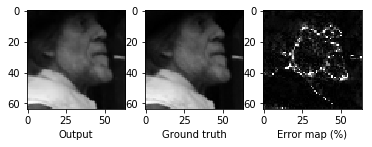

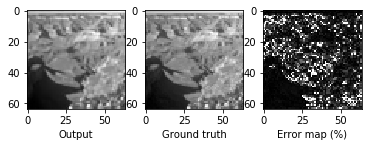

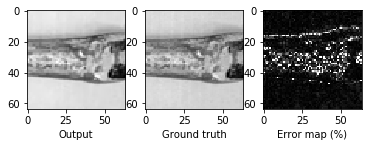

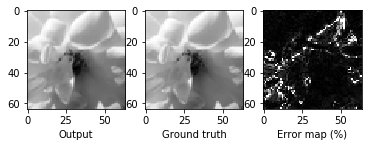

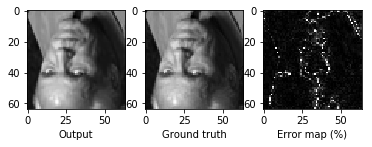

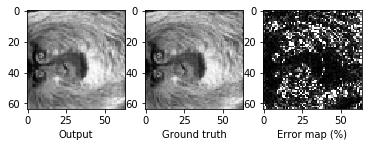

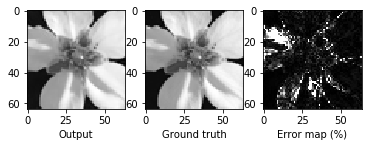

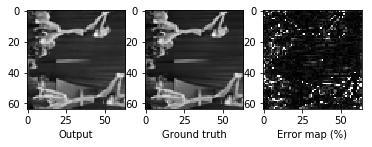

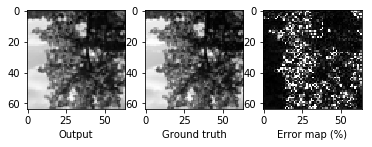

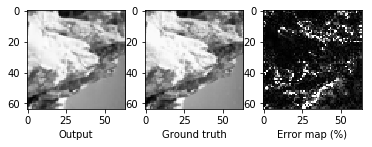

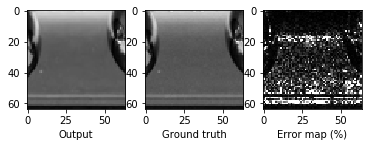

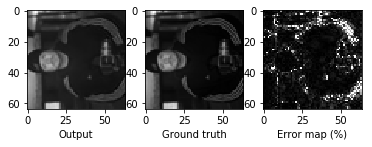

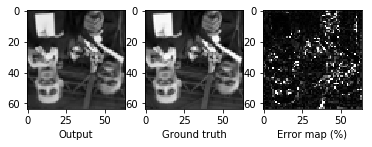

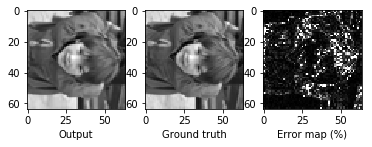

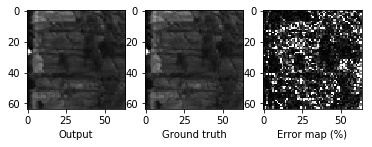

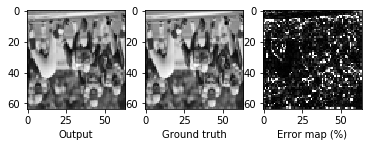

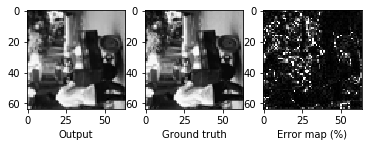

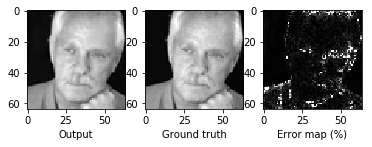

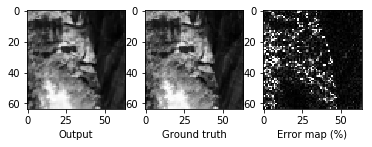

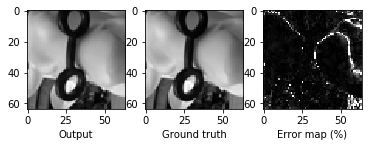

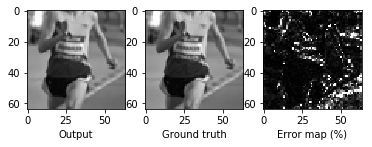

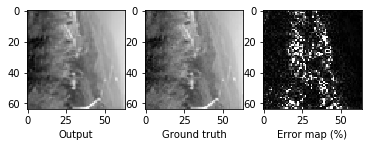

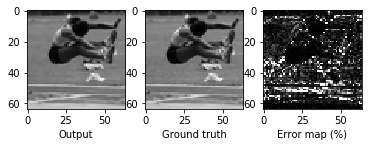

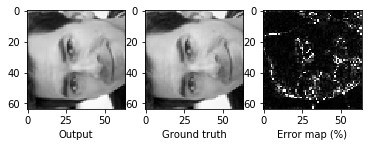

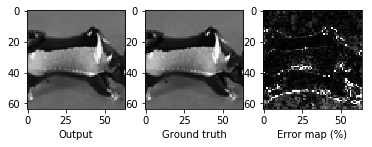

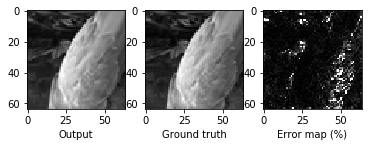

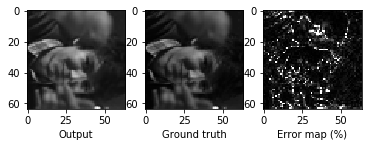

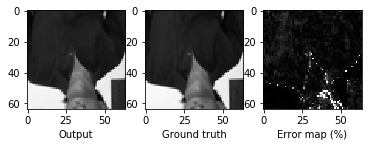

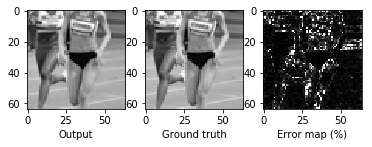

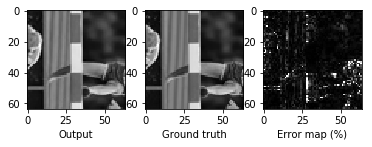

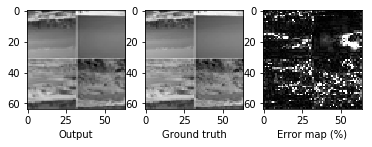

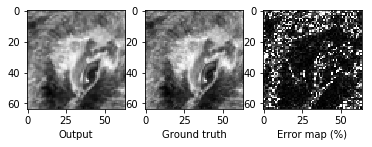

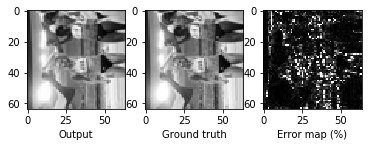

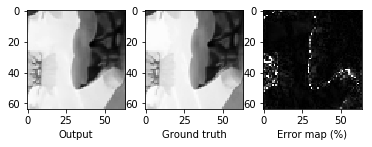

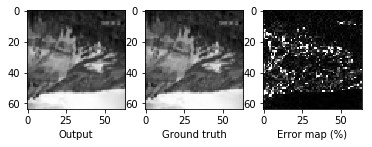

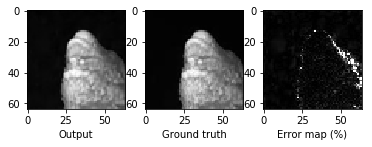

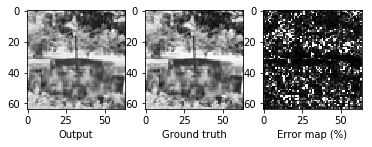

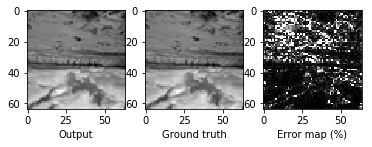

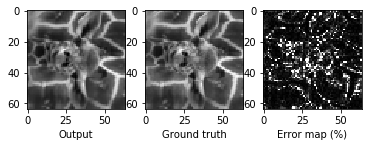

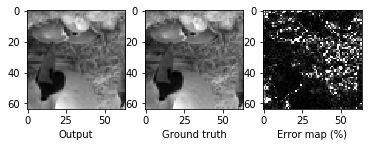

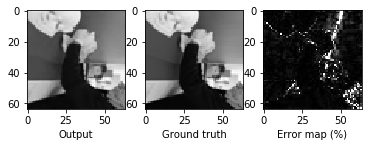

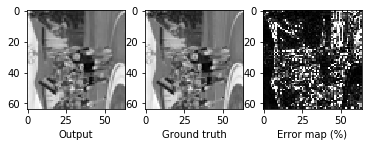

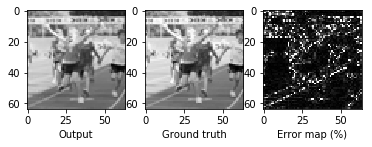

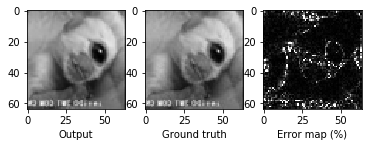

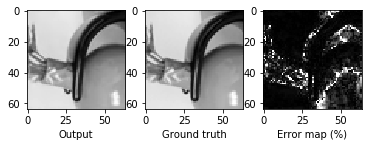

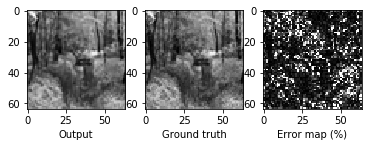

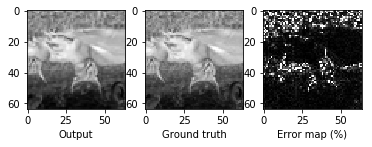

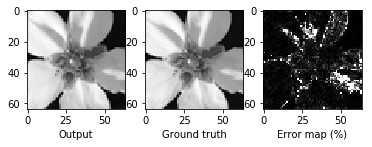

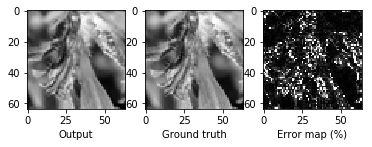

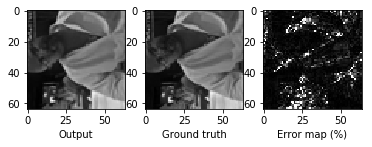

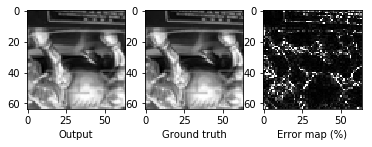

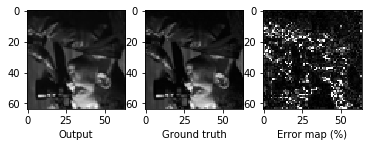

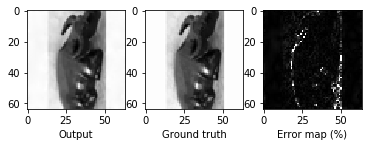

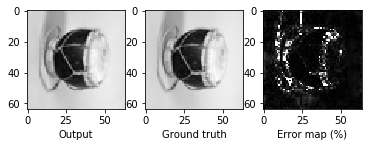

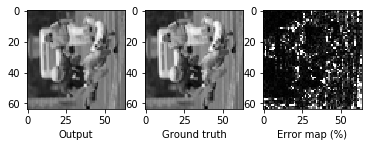

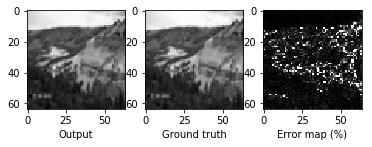

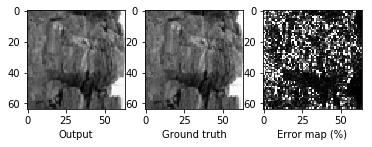

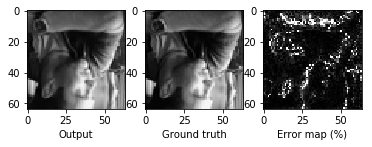

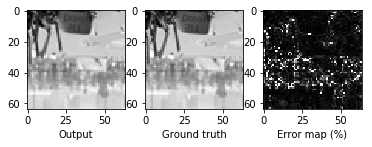

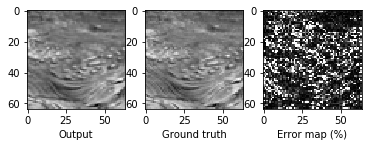

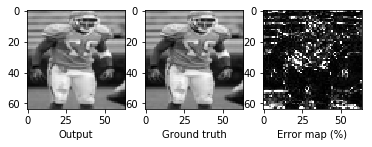

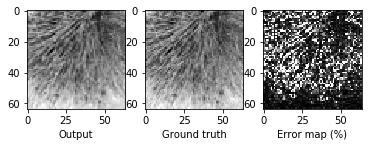

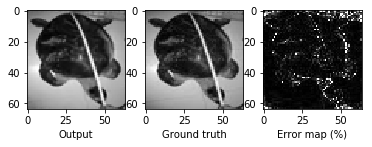

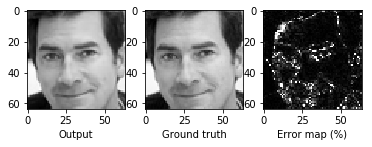

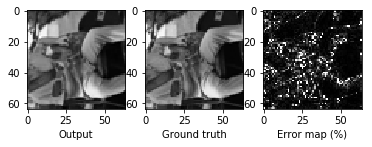

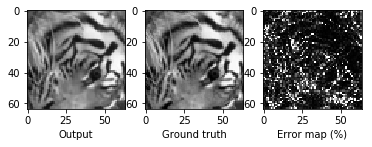

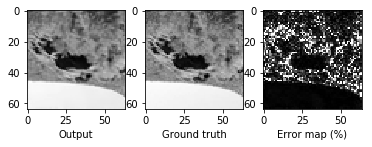

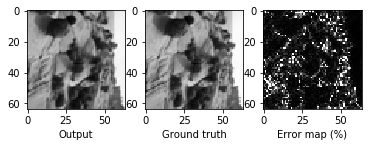

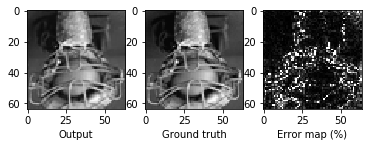

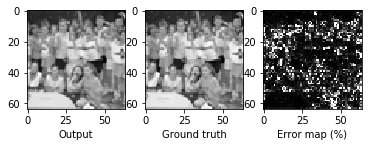

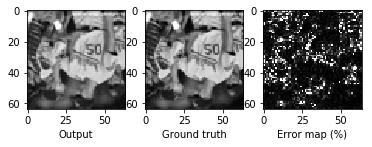

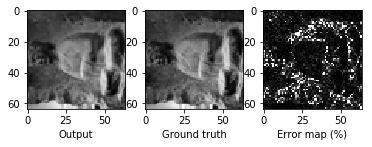

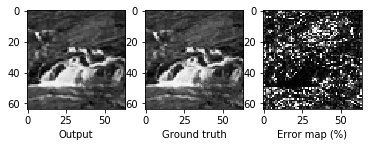

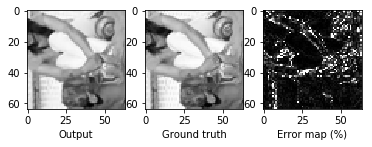

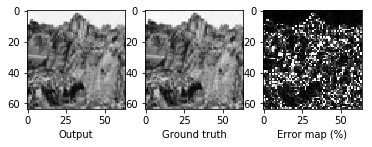

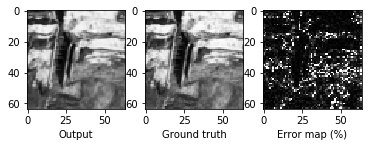

In [157]:
select = np.random.randint(x_test.shape[0], size=100)
pred = model.predict(x_test[select,:])
for i in range(0,100):
    plt.figure()
    plt.subplot(131)
    plt.imshow(np.flipud(np.squeeze(pred[i,:,:])),cmap='gray')
    plt.xlabel('Output')
    plt.subplot(132)
    plt.imshow(np.flipud(np.squeeze(y_test[select[i],:,:])),cmap='gray')
    plt.xlabel('Ground truth')
    plt.subplot(133)
    plt.imshow(np.flipud(np.squeeze(np.abs(100*(pred[i,:,:]-y_test[select[i],:,:])/y_test[select[i],:,:]))),vmin=0,vmax=100,cmap='gray')
    plt.xlabel('Error map (%)')
    plt.show